# Projeto Final para a Imerção de Dados 4 da Alura

### Importando Bibliotecas Necessaria

In [1]:
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
pd.set_option('display.precision', 2)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_columns', None)
sns.set_style("darkgrid")
sns.set_palette("colorblind")
sns.set_context("poster", font_scale=1, rc={
                "grid.linewidth": 5, "axes.linewidth": 5})

## O Projeto e os Dados
---

### O Projeto:
Esse projeto é a compilação de tudo que foi feito na quarta Imersão de Dados da Alura. Ele consiste na criação de um modelo que consiga prever o custo de um imóvel em São Paulo.

Para conseguir isso será usada uma base de dados construída durante o curso. Por questões de simplicidade vou usar a base já compilada para não ter que perder muito tempo com isso aqui.

A base conta com 5308 imóveis à venda na cidade de São Paulo.

### Os Dados:

- **Rua** -> Rua do imóvel.
- **Bairro** -> Bairro do imóvel.
- **Cidade** -> Cidade do imóvel.
- **Metragem** -> Área total do imóvel.
- **Quartos** -> Quantidade de quartos do imóvel.
- **Banheiros** -> Quantidade de banheiro do imóvel.
- **Vagas** -> Quantidade de vagas do imóvel.
- **Valor_anuncio** -> Valor do imóvel no anúncio.
- **Valor_mm** -> Valor do imóvel em milhões.
- **Valor_m2** -> Valor do metro quadrado do imóvel, calculado usando a Metragem e o Valor_anuncio.
- **latitude** -> Latitude do imóvel aproximada pela rua.
- **longitude** -> Longitude do imóvel aproximada pela rua.
- **V001** -> Domicílios particulares permanentes ou pessoas responsáveis por domicílios particulares permanentes
- **V002** -> Moradores em domicílios particulares permanentes ou população residente em domicílios particulares permanentes.
- **V003** -> Média do número de moradores em domicílios particulares permanentes (obtida pela divisão de Var2 por Var1).
- **V004** -> Variância do número de moradores em domicílios particulares permanentes.
- **V005** -> Valor do rendimento nominal médio mensal das pessoas responsáveis por domicílios particulares permanentes (com e sem rendimento).
- **V006** -> Variância do rendimento nominal mensal das pessoas responsáveis por domicílios particulares permanentes (com e sem rendimento).
- **V007** -> Valor do rendimento nominal médio mensal das pessoas responsáveis por domicílios particulares permanentes (com rendimento).
- **V008** -> Variância do rendimento nominal mensal das pessoas responsáveis por domicílios particulares permanentes (com rendimento).
- **V009** -> Valor do rendimento nominal médio mensal das pessoas de 10 anos ou mais de idade (com e sem rendimento).
- **V010** -> Variância do rendimento nominal mensal das pessoas de 10 anos ou mais de idade (com e sem rendimento).
- **V011** -> Valor do rendimento nominal médio mensal das pessoas de 10 anos ou mais de idade (com rendimento).
- **V012** -> Variância do rendimento nominal mensal das pessoas de 10 anos ou mais de idade (com rendimento).

### Nesse projeto vamos ver:

- Exploração de dados
- Tratamento de outliers
- Escolha do modelo de predição
- Ajuste de parâmetros
- Treinamento e validação

## Exploração de Dados
---

#### Leitura e visualização dos dados

In [2]:
data = pd.read_csv('dados_vendas_censo_clean.csv')
data

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio,Valor_mm,Valor_m2,latitude,longitude,V001,V002,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,7000000.00,7.00,7000.00,-23.62,-46.65,164.00,437.00,2.66,2.04,3158.96,22210644.93,5570.65,25770816.97,2096.19,13029851.56,3930.35,17241576.74
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,3700000.00,3.70,7459.68,-23.64,-46.69,136.00,425.00,3.13,1.96,7600.44,36778930.17,7890.53,35886906.64,4149.00,26760682.90,6063.92,27502674.90
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,380000.00,0.38,3040.00,-23.75,-46.70,142.00,493.00,3.47,3.06,805.13,769188.78,1011.75,757433.42,518.77,426672.78,858.51,414378.88
3,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,540000.00,0.54,5400.00,-23.55,-46.59,156.00,468.00,3.00,1.99,2338.05,7826370.15,2447.89,7925839.76,1543.29,4646566.16,1909.04,5050712.69
4,Rua Graham Bell,Santo Amaro,São Paulo,440,4,4,6,1980000.00,1.98,4500.00,-23.59,-46.76,107.00,376.00,3.51,2.31,1026.36,272168.67,1143.96,167733.64,735.67,367088.08,1086.94,159622.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5303,Rua Pedro Teixeira,Vila Olímpia,São Paulo,157,3,2,2,960000.00,0.96,6114.65,-23.60,-46.68,177.00,384.00,2.17,1.27,5054.58,33245189.73,5231.93,33485189.78,3649.06,26562232.53,4551.66,29032823.35
5304,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,1500000.00,1.50,5617.98,-23.61,-46.65,256.00,720.00,2.81,1.60,4249.33,24499871.44,5180.14,25047413.33,2618.76,17705032.31,3977.93,21495997.85
5305,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,665000.00,0.67,7000.00,-23.66,-46.69,150.00,448.00,2.99,1.81,2425.09,6878872.25,2543.80,6913867.79,1561.58,4261814.01,2062.09,4596759.57
5306,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,1050000.00,1.05,5121.95,-23.62,-46.63,400.00,1099.00,2.75,1.50,5650.20,20344622.14,5750.84,20127679.27,3459.68,16021825.60,4362.79,16264378.33


#### Informações sobre as colunas

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5308 entries, 0 to 5307
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rua            5308 non-null   object 
 1   Bairro         5308 non-null   object 
 2   Cidade         5308 non-null   object 
 3   Metragem       5308 non-null   int64  
 4   Quartos        5308 non-null   int64  
 5   Banheiros      5308 non-null   int64  
 6   Vagas          5308 non-null   int64  
 7   Valor_anuncio  5308 non-null   float64
 8   Valor_mm       5308 non-null   float64
 9   Valor_m2       5308 non-null   float64
 10  latitude       5308 non-null   float64
 11  longitude      5308 non-null   float64
 12  V001           5308 non-null   float64
 13  V002           5308 non-null   float64
 14  V003           5308 non-null   float64
 15  V004           5308 non-null   float64
 16  V005           5308 non-null   float64
 17  V006           5308 non-null   float64
 18  V007    

#### Estatísticas Descritivas

In [4]:
data.describe()

,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio,Valor_mm,Valor_m2,latitude,longitude,V001,V002,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
count,5308.00,5308.00,5308.00,5308.00,5308.00,5308.00,5308.00,5308.00,5308.00,5308.00,5308.00,5308.00,5308.00,5308.00,5308.00,5308.00,5308.00,5308.00,5308.00,5308.00,5308.00
mean,333.67,3.41,3.71,3.82,2717762.61,2.72,7638.20,-23.58,-46.66,192.93,573.22,3.01,2.12,5851.80,189954754.30,6778.39,255943344.08,3244.70,109082891.11,4831.75,189741612.44
std,558.66,1.01,1.84,2.46,3554937.44,3.55,4739.71,0.05,0.06,77.74,234.11,0.39,0.94,5104.86,933528663.62,5945.05,1760731750.80,2260.96,514711362.36,3635.67,1339079001.74
min,20.00,1.00,1.00,1.00,13000.00,0.01,65.00,-23.86,-46.80,12.00,29.00,1.61,0.70,174.91,98355.48,584.26,70021.07,91.16,106814.59,547.47,58440.21
25%,160.00,3.00,2.00,2.00,850000.00,0.85,4665.86,-23.61,-46.70,135.00,407.00,2.77,1.72,2435.97,7972389.26,2865.49,8187213.28,1603.12,5550079.83,2302.96,6241508.75
50%,255.00,3.00,3.00,3.00,1600000.00,1.60,6400.00,-23.58,-46.67,191.00,555.00,3.02,2.05,4381.23,26899668.73,5171.02,26911265.61,2788.53,18140427.35,4010.21,22074354.68
75%,410.00,4.00,5.00,5.00,3190372.25,3.19,9090.91,-23.55,-46.63,244.00,721.00,3.28,2.40,7600.23,95295750.82,8816.06,100985954.84,4277.41,56009887.34,6182.71,69979786.20
max,37000.00,11.00,14.00,38.00,65000000.00,65.00,54166.67,-23.43,-46.37,781.00,2488.00,5.21,32.90,41175.73,19436679037.42,50741.20,35468624352.67,20651.94,9521545092.67,40653.97,28642067613.82


#### Visualizando Estatísticas 

In [5]:
groupBy_Bairro = data.groupby('Bairro')

Metragem

In [6]:
m_bairro = groupBy_Bairro.Metragem.mean()
m_bairro

Bairro
Aclimação           251.07
Alto da Boa Vista   393.71
Alto da Lapa        271.49
Alto da Mooca       185.67
Alto de Pinheiros   431.73
                     ...  
Vila dos Remédios   131.67
Vila Água Funda     152.20
Água Branca         160.22
Água Fria           173.12
Água Rasa           223.67
Name: Metragem, Length: 578, dtype: float64

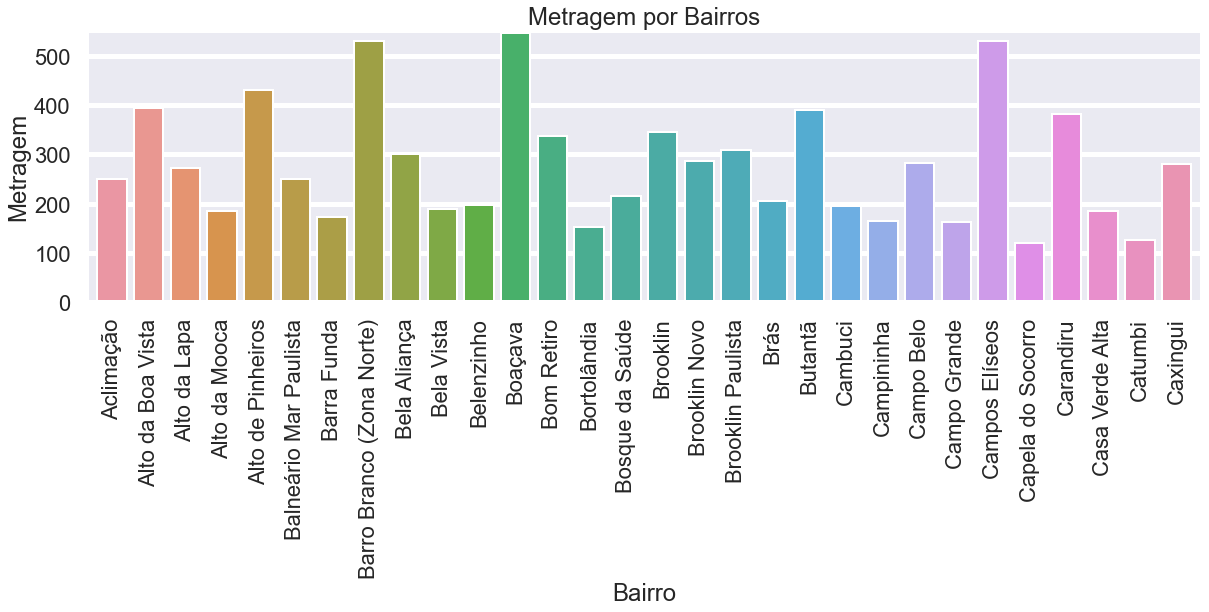

In [35]:
samples = m_bairro.head(30)
plt.figure(figsize=(20, 5))
ax = sns.barplot(x=samples.index, y=samples)
ax.set_title('Metragem por Bairros')
ax.set_ylabel('Metragem')
ax.set_xticklabels(samples.index, rotation=90)
ax.margins(0.01)
plt.show()

In [8]:
v_bairro = groupBy_Bairro['Valor_anuncio'].mean()
v_bairro

Bairro
Aclimação           1782677.79
Alto da Boa Vista   2304285.71
Alto da Lapa        2020183.67
Alto da Mooca       1212916.67
Alto de Pinheiros   4804809.38
                       ...    
Vila dos Remédios    580000.00
Vila Água Funda      652000.00
Água Branca         1090888.89
Água Fria            925000.00
Água Rasa            720000.00
Name: Valor_anuncio, Length: 578, dtype: float64

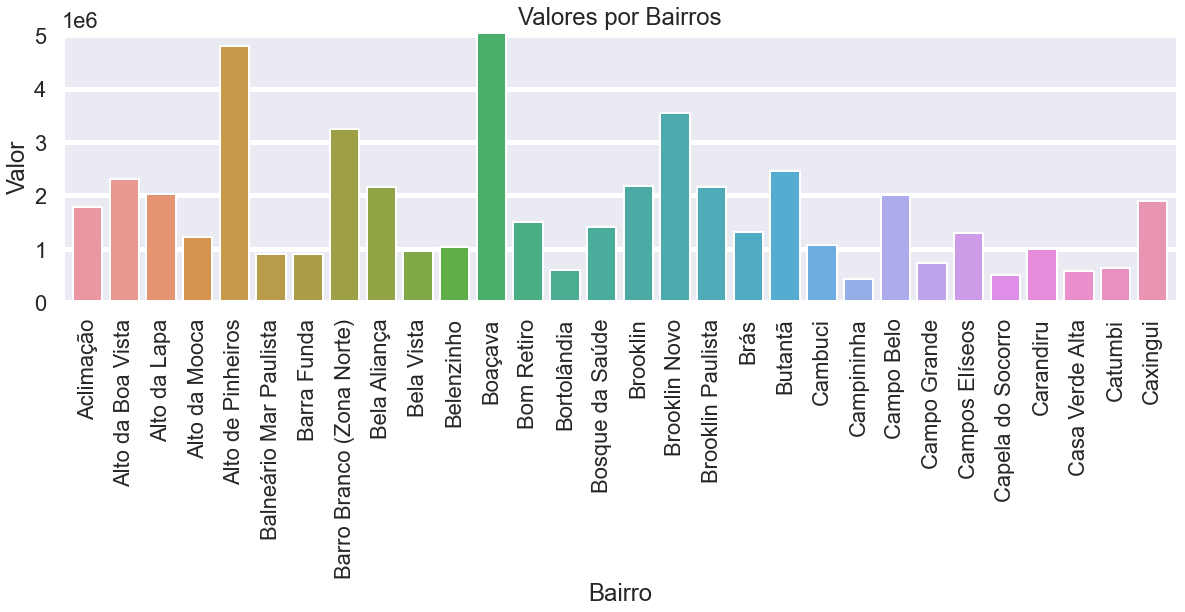

In [36]:
samples = v_bairro.head(30)
plt.figure(figsize=(20, 5))
ax = sns.barplot(x=samples.index, y=samples)
ax.set_title('Valores por Bairros')
ax.set_ylabel('Valor')
ax.set_xticklabels(samples.index, rotation=90)
ax.margins(0.01)
plt.show()


In [10]:
q_bairro = groupBy_Bairro.Quartos.mean()
q_bairro

Bairro
Aclimação           3.18
Alto da Boa Vista   4.14
Alto da Lapa        3.00
Alto da Mooca       3.75
Alto de Pinheiros   3.94
                    ... 
Vila dos Remédios   3.00
Vila Água Funda     2.60
Água Branca         3.00
Água Fria           2.88
Água Rasa           2.67
Name: Quartos, Length: 578, dtype: float64

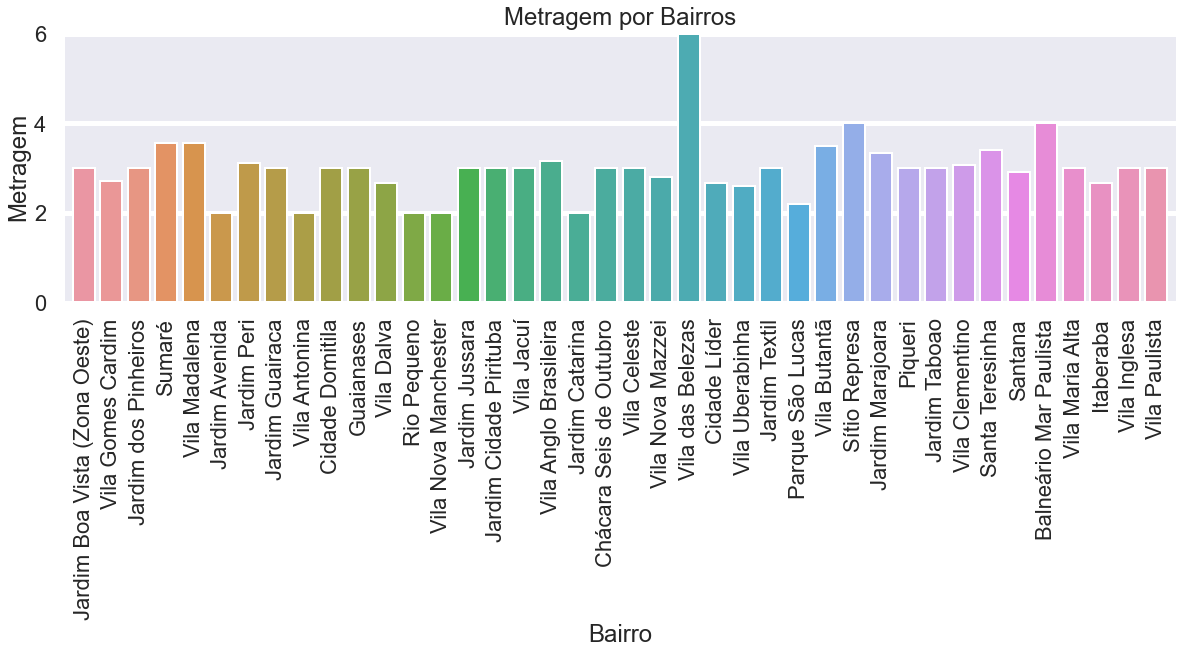

In [11]:
samples = q_bairro.sample(40)
plt.figure(figsize=(20, 5))
ax = sns.barplot(x=samples.index, y=samples)
ax.set_title('Metragem por Bairros')
ax.set_ylabel('Metragem')
ax.set_xticklabels(samples.index, rotation=90)
ax.margins(0.01)
plt.show()


In [12]:
data.corr()

,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio,Valor_mm,Valor_m2,latitude,longitude,V001,V002,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
Metragem,1.00,0.23,0.24,0.28,0.29,0.29,0.06,-0.09,-0.13,-0.13,-0.10,0.13,0.05,0.23,0.07,0.23,0.05,0.21,0.07,0.21,0.05
Quartos,0.23,1.00,0.55,0.41,0.34,0.34,0.12,-0.01,-0.19,-0.18,-0.15,0.16,0.07,0.32,0.12,0.33,0.11,0.31,0.13,0.32,0.11
Banheiros,0.24,0.55,1.00,0.45,0.44,0.44,0.22,-0.03,-0.25,-0.22,-0.17,0.21,0.07,0.41,0.11,0.41,0.08,0.39,0.12,0.40,0.08
Vagas,0.28,0.41,0.45,1.00,0.50,0.50,0.18,-0.04,-0.18,-0.21,-0.15,0.24,0.09,0.34,0.11,0.34,0.08,0.32,0.12,0.33,0.09
Valor_anuncio,0.29,0.34,0.44,0.50,1.00,1.00,0.72,0.02,-0.19,-0.21,-0.18,0.13,0.08,0.43,0.10,0.42,0.07,0.45,0.13,0.43,0.08
Valor_mm,0.29,0.34,0.44,0.50,1.00,1.00,0.72,0.02,-0.19,-0.21,-0.18,0.13,0.08,0.43,0.10,0.42,0.07,0.45,0.13,0.43,0.08
Valor_m2,0.06,0.12,0.22,0.18,0.72,0.72,1.00,0.05,-0.18,-0.12,-0.15,-0.12,0.01,0.29,0.04,0.28,0.02,0.37,0.06,0.32,0.02
latitude,-0.09,-0.01,-0.03,-0.04,0.02,0.02,0.05,1.00,0.15,-0.00,-0.02,-0.05,0.03,-0.05,-0.09,-0.06,-0.07,-0.04,-0.07,-0.07,-0.06
longitude,-0.13,-0.19,-0.25,-0.18,-0.19,-0.19,-0.18,0.15,1.00,0.31,0.30,-0.05,0.02,-0.36,-0.10,-0.36,-0.07,-0.38,-0.10,-0.37,-0.07
V001,-0.13,-0.18,-0.22,-0.21,-0.21,-0.21,-0.12,-0.00,0.31,1.00,0.95,-0.22,-0.12,-0.38,-0.10,-0.39,-0.10,-0.36,-0.13,-0.37,-0.11


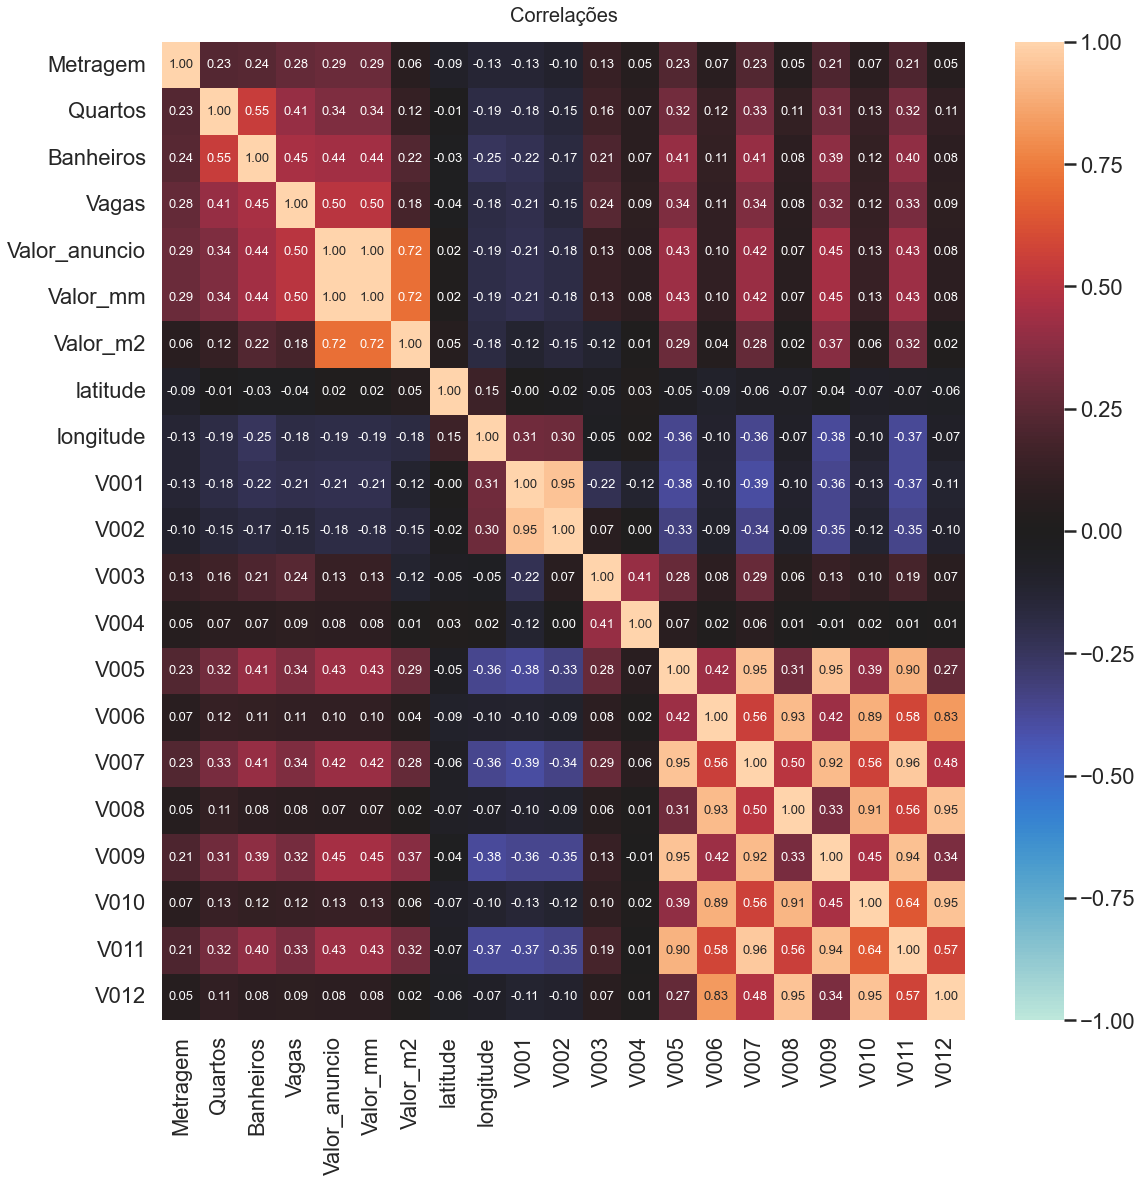

In [13]:
plt.figure(figsize=(18, 18))
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1,
                      annot=True, fmt='.2f', annot_kws={"size": 13}, cmap='icefire')
heatmap.set_title('Correlações', fontdict={'fontsize': 20},pad=20)
plt.show()

## Tratamento de outliers
---

Para o tratamento de outliers vamos começar com algumas visualizações

(0.0, 12.0)

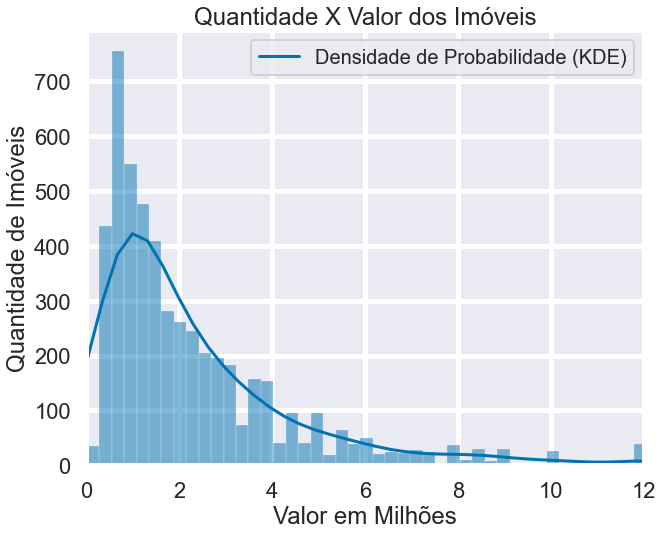

In [14]:
plt.figure(figsize=(10, 8))
ax = sns.histplot(data=data, x="Valor_mm", kde=True)
ax.set_title("Quantidade X Valor dos Imóveis")
ax.set_xlabel("Valor em Milhões")
ax.set_ylabel("Quantidade de Imóveis")
ax.legend(['Densidade de Probabilidade (KDE)'], prop={'size': 20})
plt.xlim((0, 12))

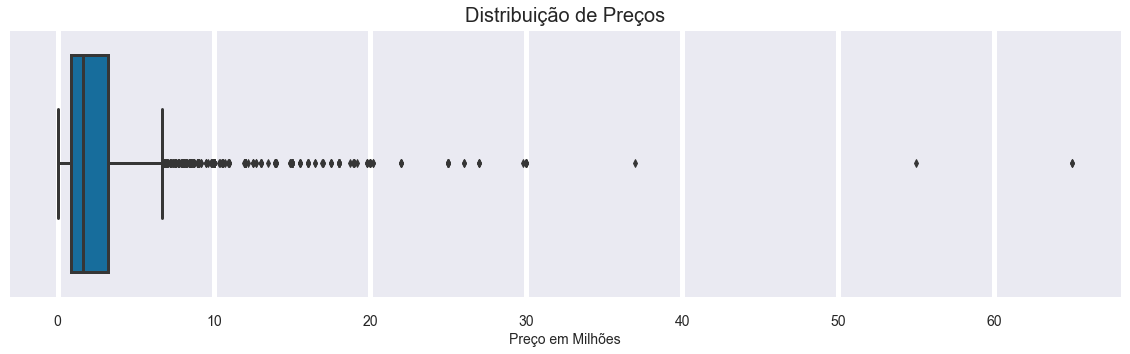

In [15]:
plt.figure(figsize=(20, 5))
ax = sns.boxplot(data['Valor_mm'])
plt.xticks(fontsize=14)
plt.xlabel('Preço em Milhões', fontsize=14)
plt.title('Distribuição de Preços', fontsize=20)
plt.show()

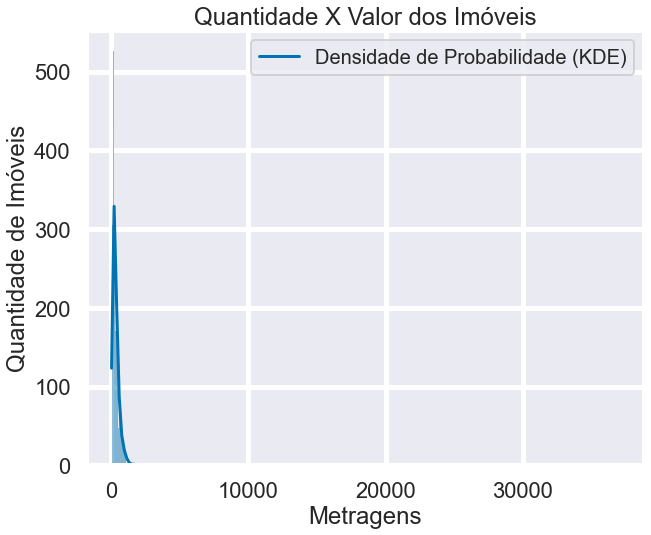

In [16]:
plt.figure(figsize=(10, 8))
ax = sns.histplot(data=data, x="Metragem", kde=True)
ax.set_title("Quantidade X Valor dos Imóveis")
ax.set_xlabel("Metragens")
ax.set_ylabel("Quantidade de Imóveis")
ax.legend(['Densidade de Probabilidade (KDE)'], prop={'size': 20})

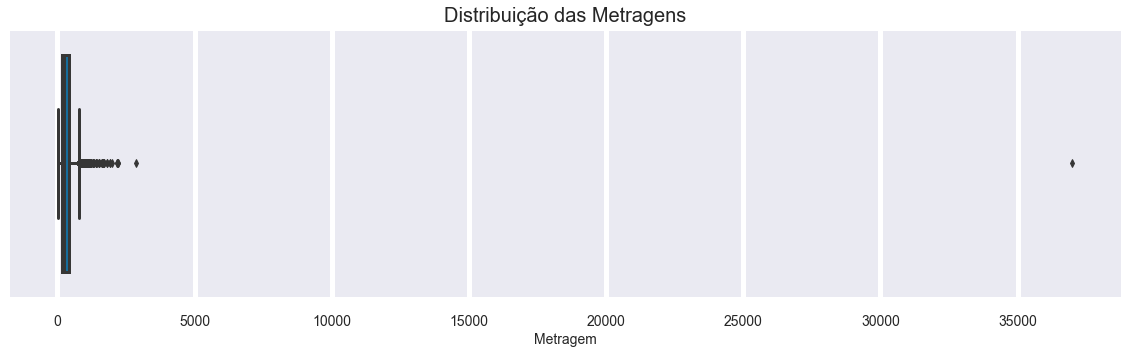

In [17]:
plt.figure(figsize=(20, 5))
ax = sns.boxplot(data['Metragem'])
plt.xticks(fontsize=14)
plt.xlabel('Metragem', fontsize=14)
plt.title('Distribuição das Metragens', fontsize=20)
plt.show()

Dando um zoom para visualizar melhor as distribuições mais perto da média

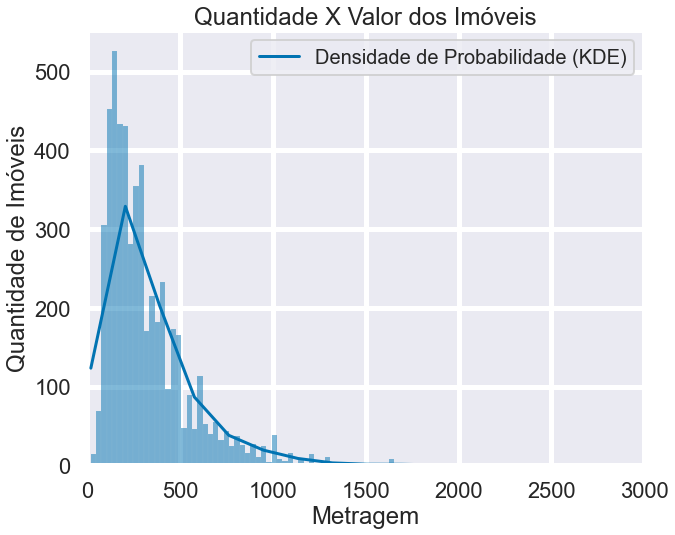

In [18]:
plt.figure(figsize=(10, 8))
ax = sns.histplot(data=data, x="Metragem", kde=True)
ax.set_title("Quantidade X Valor dos Imóveis")
ax.set_xlabel("Metragem")
ax.set_ylabel("Quantidade de Imóveis")
ax.legend(['Densidade de Probabilidade (KDE)'], prop={'size': 20})
ax.set_xlim(-5, 3000)
plt.show()

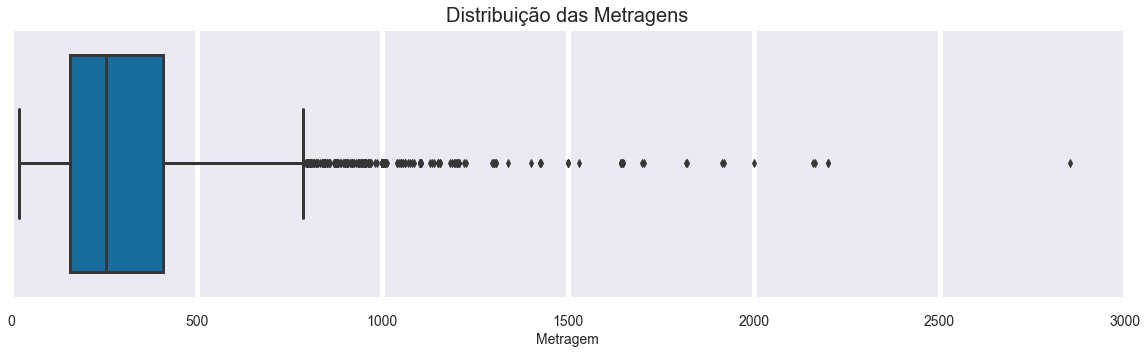

In [19]:
plt.figure(figsize=(20, 5))
ax = sns.boxplot(data['Metragem'])
plt.xticks(fontsize=14)
plt.xlabel('Metragem', fontsize=14)
plt.title('Distribuição das Metragens', fontsize=20)
ax.set_xlim(-5, 3000)
plt.show()


Com base nos gráficos faremos o seguinte tratamento

In [20]:
data.query(
    'Valor_anuncio > 20000000 | Valor_anuncio < 100000 | Metragem > 3000')


,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio,Valor_mm,Valor_m2,latitude,longitude,V001,V002,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
54,Rua Inglaterra,Jardim Europa,São Paulo,200,3,3,2,13000.00,0.01,65.00,-23.57,-46.68,115.00,360.00,3.13,2.87,21545.71,1577883376.43,26081.65,1794039881.36,11050.67,882338714.47,15470.93,1168079134.43
85,Rua Inglaterra,Jardim Europa,São Paulo,756,5,4,10,37000000.00,37.00,48941.80,-23.57,-46.68,115.00,360.00,3.13,2.87,21545.71,1577883376.43,26081.65,1794039881.36,11050.67,882338714.47,15470.93,1168079134.43
182,Rua dos Franceses,Morro dos Ingleses,São Paulo,1039,6,7,20,22000000.00,22.00,21174.21,-23.56,-46.65,136.00,388.00,2.85,2.20,6550.81,196752306.75,7302.54,213982113.32,3186.21,68443823.96,4180.81,85698353.09
380,Rua Marechal Bitencourt,Jardim Paulista,São Paulo,967,4,5,8,25000000.00,25.00,25853.15,-23.58,-46.67,284.00,933.00,3.29,2.54,6918.36,116870875.01,7675.06,123873294.66,3194.38,53470273.57,5997.32,83644284.88
414,Avenida das Magnólias,Cidade Jardim,São Paulo,1915,4,8,25,25000000.00,25.00,13054.83,-23.59,-46.70,85.00,316.00,3.72,2.35,9390.13,203454625.47,17351.33,238574929.78,6830.71,2305010249.82,13566.54,4501880520.70
424,Avenida das Magnólias,Cidade Jardim,São Paulo,1920,4,8,25,25000000.00,25.00,13020.83,-23.59,-46.70,85.00,316.00,3.72,2.35,9390.13,203454625.47,17351.33,238574929.78,6830.71,2305010249.82,13566.54,4501880520.70
438,Rua Panamá,Jardim América,São Paulo,950,4,4,6,26000000.00,26.00,27368.42,-23.57,-46.67,66.00,207.00,3.14,2.95,7177.58,88682981.72,7765.90,91428201.26,4323.09,60996850.32,5764.11,73108782.96
440,Rua Panamá,Jardim América,São Paulo,955,4,4,6,26000000.00,26.00,27225.13,-23.57,-46.67,66.00,207.00,3.14,2.95,7177.58,88682981.72,7765.90,91428201.26,4323.09,60996850.32,5764.11,73108782.96
493,Rua Canadá,Jardim América,São Paulo,675,4,5,6,27000000.00,27.00,40000.00,-23.57,-46.67,116.00,414.00,3.57,3.01,13131.61,508165993.72,14507.30,541764826.89,7934.91,364776324.15,10168.24,445001716.57
560,Rua Prudente Correia,Jardim Europa,São Paulo,900,4,8,12,30000000.00,30.00,33333.33,-23.58,-46.69,125.00,316.00,2.53,2.28,6629.68,67930232.15,8816.06,71091082.19,4636.52,56710757.72,7428.67,70195016.01


In [21]:
data.drop(data.query(
    'Valor_anuncio > 25000000 | Valor_anuncio < 100000 | Metragem > 3000').index, inplace=True)


Resultado

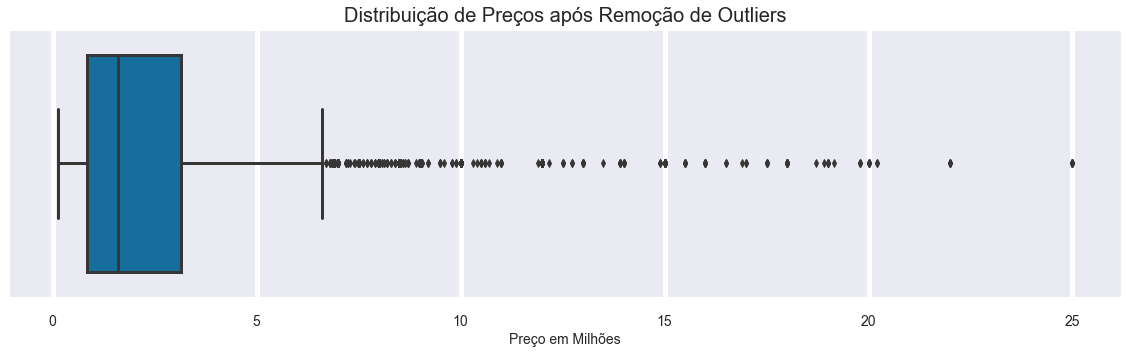

In [22]:
plt.figure(figsize=(20, 5))
ax = sns.boxplot(data['Valor_mm'])
plt.xticks(fontsize=14)
plt.xlabel('Preço em Milhões', fontsize=14)
plt.title('Distribuição de Preços após Remoção de Outliers', fontsize=20)
plt.show()

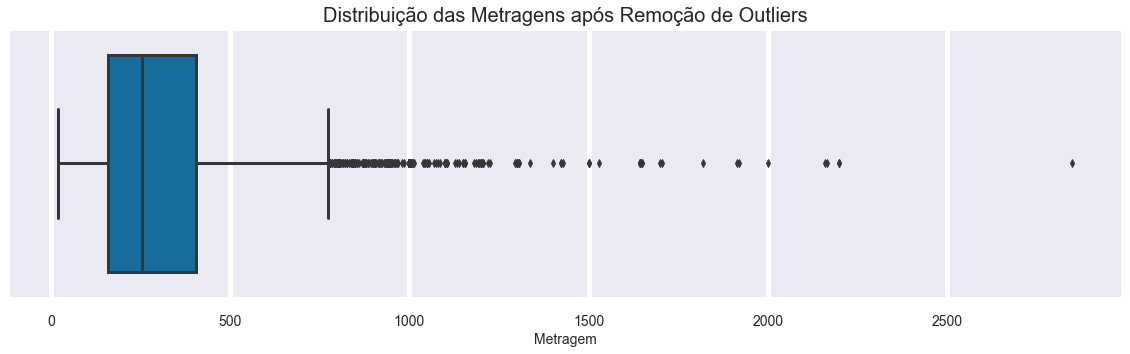

In [23]:
plt.figure(figsize=(20, 5))
ax = sns.boxplot(data['Metragem'])
plt.xticks(fontsize=14)
plt.xlabel('Metragem', fontsize=14)
plt.title('Distribuição das Metragens após Remoção de Outliers', fontsize=20)
plt.show()


## Escolha do modelo de predição
---

### Base Line

Antes de mais nada vou criar um algoritmo para servir de baseline.

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

X_base = data[['Metragem', 'Quartos', 'Banheiros', 'Vagas']]
y_base = data['Valor_anuncio']

X_train_base, X_test_base, Y_train_base, Y_test_base = train_test_split(
    X_base, y_base, test_size=0.25, random_state=54)

liR = LinearRegression()
liR.fit(X_train_base, Y_train_base)
Y_base_pred = liR.predict(X_test_base)

mae_base = mean_absolute_error(Y_test_base, Y_base_pred)
r2_base = r2_score(Y_test_base, Y_base_pred)
(mae_base, r2_base)


(1183159.616514166, 0.5244613860401866)

Agora vamos a alguns testes preliminares para a escolha dos algoritmos 

In [25]:
X = data[['Metragem', 'Quartos', 'Banheiros', 'Vagas',
          'latitude', 'longitude', 'V001', 'V002', 'V003', 'V004', 'V005', 'V006', 'V007', 'V008', 'V009', 'V010', 'V011', 'V012']]
Y = data['Valor_anuncio']

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.25, random_state=54)


In [26]:
ls = LinearRegression()
ls.fit(X_train, Y_train)
Y_train_pred = ls.predict(X_test)
mae = mean_absolute_error(Y_test, Y_train_pred)
r2 = r2_score(Y_test, Y_train_pred)
(mae, r2)


(1118210.1990855301, 0.586718328409132)

In [27]:
from sklearn.neural_network import MLPRegressor

mlpr = MLPRegressor()

mlpr.fit(X_train, Y_train)

Y_train_pred = mlpr.predict(X_test)

mae = mean_absolute_error(Y_test, Y_train_pred)
r2 = r2_score(Y_test, Y_train_pred)
(mae, r2)


(2194012.511521715, -0.7738756419114818)

In [28]:
from sklearn.svm import SVR

svr = SVR()

svr.fit(X_train, Y_train)

Y_train_pred = svr.predict(X_test)

mae = mean_absolute_error(Y_test, Y_train_pred)
r2 = r2_score(Y_test, Y_train_pred)
(mae, r2)


(1737071.99566685, -0.13004863677706302)

In [29]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()

knr.fit(X_train, Y_train)

Y_train_pred = knr.predict(X_test)

mae = mean_absolute_error(Y_test, Y_train_pred)
r2 = r2_score(Y_test, Y_train_pred)
(mae, r2)


(992230.5974300831, 0.6155189849885777)

In [30]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)

lr.fit(X_train, Y_train)

Y_train_pred = lr.predict(X_test)

mae = mean_absolute_error(Y_test, Y_train_pred)
r2 = r2_score(Y_test, Y_train_pred)
(mae, r2)


(3002978.1368102795, -0.5137509303197114)

Vamos continuar com os dois melhores algoritimos: LinearRegression e KNeighborsRegressor

Agora vamos Normalizar os valores das variáveis melhora o desempenho dos modelos

In [31]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()

X_scaled = scale.fit_transform(data[['Metragem', 'Quartos', 'Banheiros', 'Vagas',
          'latitude', 'longitude', 'V001', 'V002', 'V003', 'V004', 'V005', 'V006', 'V007', 'V008', 'V009', 'V010', 'V011', 'V012']])
Y_scaled = data['Valor_anuncio']

In [32]:
from sklearn.model_selection import GridSearchCV

knr = KNeighborsRegressor()

paramsKNN = {
    'n_neighbors': [5, 6, 7, 8, 9, 10],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
}

gsKNN = GridSearchCV(knr, paramsKNN, cv=5, n_jobs=-1, scoring='r2')

gsKNN.fit(X_train_scaled, Y_train_scaled)
print('Best params MLPR:\n' + str(gsKNN.best_params_) + '\n')
print('Best score MLPR:\n' + str(gsKNN.best_score_) + '\n')


NameError: name 'X_train_scaled' is not defined

In [ ]:
ls = LinearRegression()

paramsLS = {
    'fit_intercept': [True, False],
    'normalize': [True, False],
    'copy_X': [True, False],
}

gsLS = GridSearchCV(ls, paramsLS, cv=5, n_jobs=-1, scoring='r2')

gsLS.fit(X_train_scaled, Y_train_scaled)
print('Best params MLPR:\n' + str(gsLS.best_params_) + '\n')
print('Best score MLPR:\n' + str(gsLS.best_score_) + '\n')


Best params MLPR:
{'copy_X': True, 'fit_intercept': True, 'normalize': True}

Best score MLPR:
0.5650394301745609



## Treinamento e validação
---

Por último vamos verificar se todos os parâmetros que estamos usando realmente contribuindo para o desempenho do algoritmo ou se retirarmos alguns parâmetros a performance melhora 

Já fiz alguns testes preliminares então vamos seguir com os seguintes parâmetros:

Metragem, Quartos, Banheiros, latitude, longitude, V005, V007, V009, V011

In [ ]:
X_scaled = data[['Metragem', 'Quartos', 'Banheiros',
                        'latitude', 'longitude', 'V005', 'V007', 'V009', 'V011']]
Y_scaled = data['Valor_anuncio']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_scaled)


In [ ]:
knr = KNeighborsRegressor()

paramsKNN = {
    'n_neighbors': [7, 8, 9, 10],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
}

gsKNN = GridSearchCV(knr, paramsKNN, cv=5, n_jobs=-1, scoring='r2')

gsKNN.fit(X_scaled, Y_scaled)
print('Best params MLPR:\n' + str(gsKNN.best_params_) + '\n')
print('Best score MLPR:\n' + str(gsKNN.best_score_) + '\n')


Best params MLPR:
{'algorithm': 'ball_tree', 'n_neighbors': 8, 'weights': 'distance'}

Best score MLPR:
0.7133649002829572



In [ ]:
ls = LinearRegression()

paramsLS = {
    'fit_intercept': [True, False],
    'normalize': [True, False],
    'copy_X': [True, False],
}

gsLS = GridSearchCV(ls, paramsLS, cv=5, n_jobs=-1, scoring='r2')

gsLS.fit(X_scaled, Y_scaled)
print('Best params MLPR:\n' + str(gsLS.best_params_) + '\n')
print('Best score MLPR:\n' + str(gsLS.best_score_) + '\n')


Best params MLPR:
{'copy_X': True, 'fit_intercept': True, 'normalize': False}

Best score MLPR:
0.5400578922453374



A partir daqui vamos continuar apenas com o KNN, uma vez que foi o algoritmo que melhor performou.

Agora vamos fazer o processo final de treinamento e validação para chegar a um modelo final.

In [ ]:
X = data[['Metragem', 'Quartos', 'Banheiros',
          'latitude', 'longitude', 'V005', 'V007', 'V009', 'V011']]
Y = data['Valor_anuncio']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(
    X_scaled, Y, test_size=0.25, random_state=54)

In [ ]:
from sklearn.model_selection import cross_val_score

knn = KNeighborsRegressor(algorithm='ball_tree', n_neighbors=6, weights='distance')

cross_val = cross_val_score(knr, X_scaled, Y,
                            cv=10, n_jobs=-1, scoring='r2')

cross_val.mean()

0.7200321171940488

In [ ]:
knr = KNeighborsRegressor(algorithm='ball_tree',
                          n_neighbors=8, weights='distance')

knr.fit(X_train, Y_train)

Y_train_pred = knr.predict(X_test)

mae = mean_absolute_error(Y_test, Y_train_pred)
r2 = r2_score(Y_test, Y_train_pred)
(mae, r2)


(617266.9174088704, 0.8005379706473179)

## Resultados Finais
---

Com esse processo alcançamos um r2 de 0.8 o que é muito bom. É preciso lembrar porém que, 5000 exemplos como tínhamos aqui não é uma base de dados grande o bastante para treinar um algoritmo para produção, mas como estamos em um ambiente de aprendizagem acho que o resultado foi satisfatório.

Text(0.5, 1.0, 'KNN')

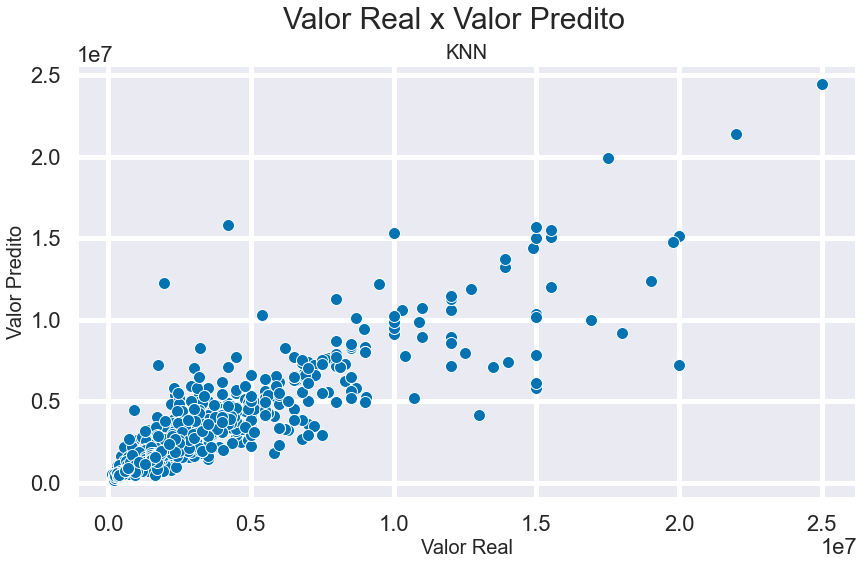

In [ ]:
plt.figure(figsize=(14, 8))
ax = sns.scatterplot(x=Y_test, y=Y_train_pred)
ax.set_ylabel('Valor Predito', fontsize=20)
ax.set_xlabel('Valor Real', fontsize=20)
plt.ticklabel_format(style='sci', axis='y', scilimits=(7,7))
ax.figure.suptitle('Valor Real x Valor Predito', fontsize=30)
ax.set_title('KNN', fontsize=20)
plt.show()